In [27]:
import math

c_dict = {
    4: 64,
    6: 0.05 #24# 0.1#0.05
}

cidr_max = {
    4: 28,
    6: 48
}

def __get_min_samples(ip_version, mask):

    c= c_dict[ip_version]

    ipv_max = 32
    if ip_version == 6:
        ipv_max = 64

    # TODO für später
    min_samples=int(c * math.sqrt( math.pow(2, (ipv_max - mask))))

    # bei v6 doppelte wurzel

    # self.logger.info(f"min samples: {min_samples}")
    return min_samples

for i in range(0, cidr_max[6]):
    print(f" {i}:\t{__get_min_samples(6,i)}")


 0:	214748364
 1:	151850024
 2:	107374182
 3:	75925012
 4:	53687091
 5:	37962506
 6:	26843545
 7:	18981253
 8:	13421772
 9:	9490626
 10:	6710886
 11:	4745313
 12:	3355443
 13:	2372656
 14:	1677721
 15:	1186328
 16:	838860
 17:	593164
 18:	419430
 19:	296582
 20:	209715
 21:	148291
 22:	104857
 23:	74145
 24:	52428
 25:	37072
 26:	26214
 27:	18536
 28:	13107
 29:	9268
 30:	6553
 31:	4634
 32:	3276
 33:	2317
 34:	1638
 35:	1158
 36:	819
 37:	579
 38:	409
 39:	289
 40:	204
 41:	144
 42:	102
 43:	72
 44:	51
 45:	36
 46:	25
 47:	18


currently 1558 minutes done
IPD run: avg: 33.32413350449294s; min: 0; max: 93
iteration run: avg: 131.05905006418485s; min: 10s; max: 230s


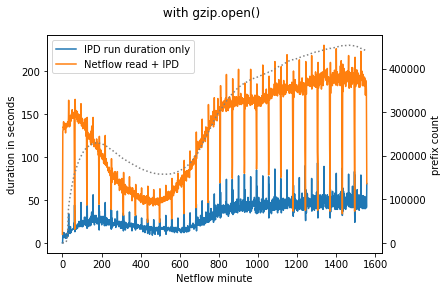

In [10]:
import datetime
import matplotlib.pyplot as plt

#logfile="/home/mehneste/ipd_algo/log/q0.95_c64-24_cidr_max28-48_t60_e120_decaydefault.log" # read rb
logfile="/home/mehneste/ipd_algo/log/q0.95_c64-24_cidr_max28-48_t60_e120_decaydefault.log" # read rt 


### data stuff

format = "%Y-%m-%d %H:%M:%S,%f"

file = open(logfile, 'r')
Lines = file.readlines()

count=0
last_start_ts=None
start_ts=None
end_ts=None

ipd_run_list=[]
iteration_run_list=[]
prefix_list=[]
for line in Lines:
    count += 1
    # print("Line{}: {}".format(count, line.strip()))
    x = line.split(" ")

    ts=datetime.datetime.strptime(f"{x[0]} {x[1]}", format)
    #print(ts)
    if last_start_ts == None:   last_start_ts = ts
    if "run IPD" in line:
        start_ts=ts

        try:
            prefix_list.append(int(x[-2]))
        except:
            pass

        if last_start_ts != start_ts:
            iteration_duration= start_ts- last_start_ts
            iteration_run_list.append(iteration_duration.seconds)
            last_start_ts = start_ts
        
    elif "Finished" in line:
        end_ts=ts
        duration = end_ts - start_ts
        ipd_run_list.append(duration.seconds)

## plotting stuff

fig,ax = plt.subplots()
ax.plot(ipd_run_list, label="IPD run duration only")
ax.plot(iteration_run_list, label="Netflow read + IPD")


ax.set_xlabel("Netflow minute")
ax.set_ylabel("duration in seconds")
plt.legend()

ax2=ax.twinx()
ax2.plot(prefix_list, label="prefix count", linestyle="dotted", color="grey")
ax2.set_ylabel("prefix count")



plt.suptitle(" with gzip.open()")
print(f"currently {len(iteration_run_list)} minutes done")
print(f"IPD run: avg: {sum(ipd_run_list) / len(ipd_run_list)}s; min: {min(ipd_run_list)}; max: {max(ipd_run_list)}")
print(f"iteration run: avg: {sum(iteration_run_list) / len(iteration_run_list)}s; min: {min(iteration_run_list)}s; max: {max(iteration_run_list)}s")




currently 1558 minutes done
IPD run: avg: 52.640564826700896s; min: 0; max: 122
iteration run: avg: 109.88254172015404s; min: 5s; max: 206s


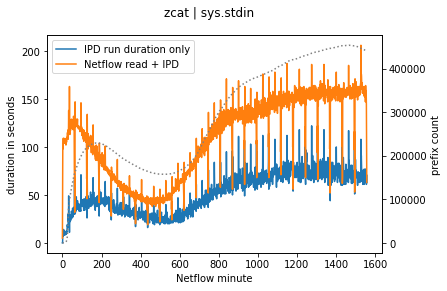

In [11]:
import datetime
from sys import prefix
import matplotlib.pyplot as plt

logfile="/home/mehneste/ipd_algo/log_stdin/q0.95_c64-24_cidr_max28-48_t60_e120_decaydefault.log" # read rb
#logfile="/home/mehneste/ipd_algo/log_rt/q0.95_c64-24_cidr_max28-48_t60_e120_decaydefault.log" # read rt 


### data stuff

format = "%Y-%m-%d %H:%M:%S,%f"

file = open(logfile, 'r')
Lines = file.readlines()

count=0
last_start_ts=None
start_ts=None
end_ts=None

ipd_run_list=[]
iteration_run_list=[]
prefix_list=[]
for line in Lines:
    count += 1
    # print("Line{}: {}".format(count, line.strip()))
    x = line.split(" ")

    ts=datetime.datetime.strptime(f"{x[0]} {x[1]}", format)
    #print(ts)
    if last_start_ts == None:   last_start_ts = ts
    if "run IPD" in line:
        start_ts=ts
        try:
            prefix_list.append(int(x[-2]))
        except:
            pass
        if last_start_ts != start_ts:
            iteration_duration= start_ts- last_start_ts
            iteration_run_list.append(iteration_duration.seconds)
            last_start_ts = start_ts
        
    elif "Finished" in line:
        end_ts=ts
        duration = end_ts - start_ts
        ipd_run_list.append(duration.seconds)

## plotting stuff

fig,ax = plt.subplots()
ax.plot(ipd_run_list, label="IPD run duration only")
ax.plot(iteration_run_list, label="Netflow read + IPD")


ax.set_xlabel("Netflow minute")
ax.set_ylabel("duration in seconds")
plt.legend()

ax2=ax.twinx()
ax2.plot(prefix_list, label="prefix count", linestyle="dotted", color="grey")
ax2.set_ylabel("prefix count")


plt.suptitle("zcat | sys.stdin")

print(f"currently {len(iteration_run_list)} minutes done")
print(f"IPD run: avg: {sum(ipd_run_list) / len(ipd_run_list)}s; min: {min(ipd_run_list)}; max: {max(ipd_run_list)}")
print(f"iteration run: avg: {sum(iteration_run_list) / len(iteration_run_list)}s; min: {min(iteration_run_list)}s; max: {max(iteration_run_list)}s")


currently 819.0 minutes done
IPD run: avg: 52.83638583638584s; min: 0; max: 140
iteration run: avg: 99.23321123321124s; min: 5s; max: 198s


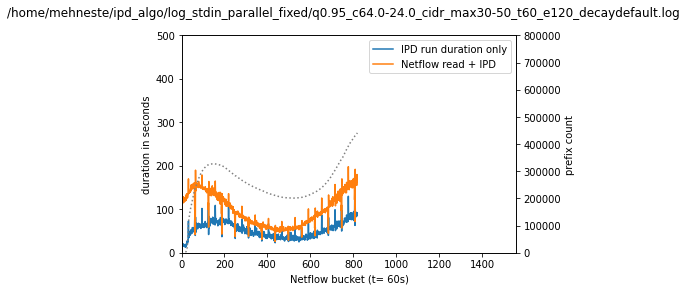

currently 702.0 minutes done
IPD run: avg: 87.17236467236468s; min: 0; max: 157
iteration run: avg: 115.88888888888889s; min: 5s; max: 215s


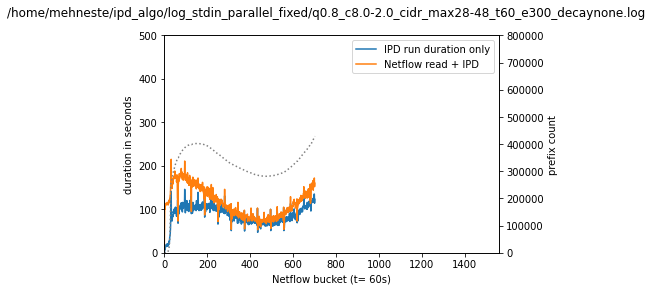

currently 658.5 minutes done
IPD run: avg: 31.011380880121397s; min: 0; max: 74
iteration run: avg: 46.82004555808656s; min: 0s; max: 107s


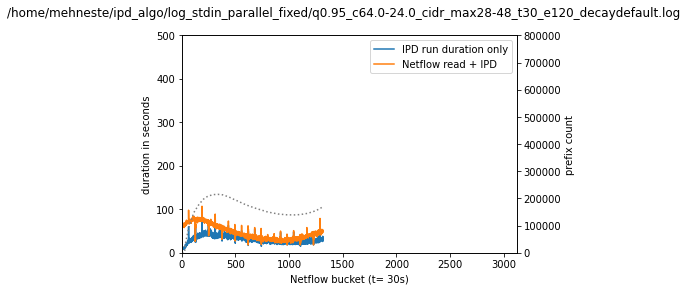

currently 956.0 minutes done
IPD run: avg: 34.46652719665272s; min: 0; max: 99
iteration run: avg: 84.98953974895397s; min: 5s; max: 175s


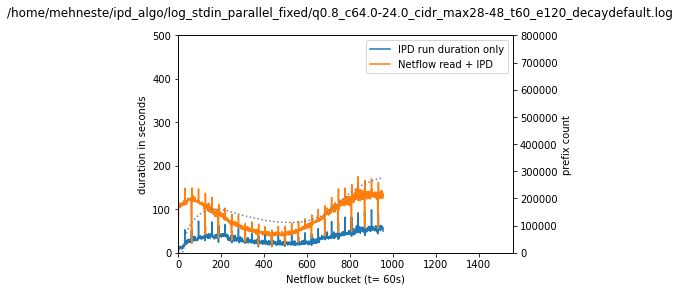

currently 870.0 minutes done
IPD run: avg: 48.928899082568805s; min: 0; max: 122
iteration run: avg: 142.60459770114943s; min: 37s; max: 279s


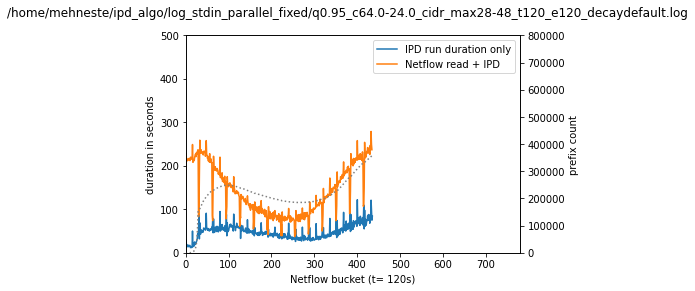

currently 991.0 minutes done
IPD run: avg: 28.495967741935484s; min: 0; max: 89
iteration run: avg: 81.92129162462159s; min: 5s; max: 156s


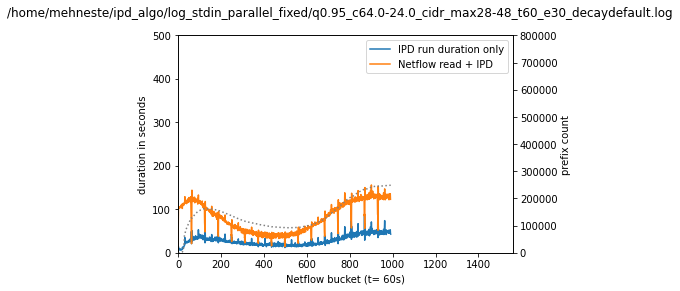

currently 934.0 minutes done
IPD run: avg: 39.610695187165774s; min: 0; max: 110
iteration run: avg: 86.92505353319058s; min: 5s; max: 174s


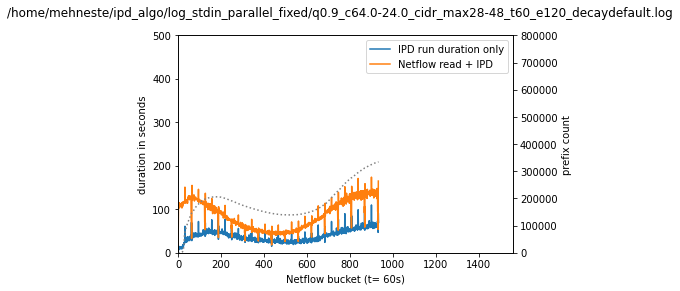

currently 668.0 minutes done
IPD run: avg: 27.961077844311376s; min: 0; max: 72
iteration run: avg: 46.15494011976048s; min: 0s; max: 104s


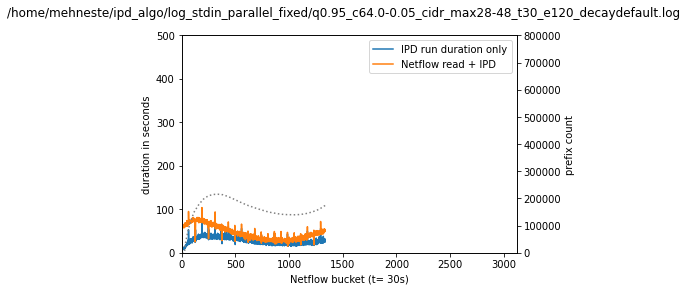

currently 776.0 minutes done
IPD run: avg: 36.638352638352636s; min: 0; max: 80
iteration run: avg: 79.90721649484536s; min: 5s; max: 157s


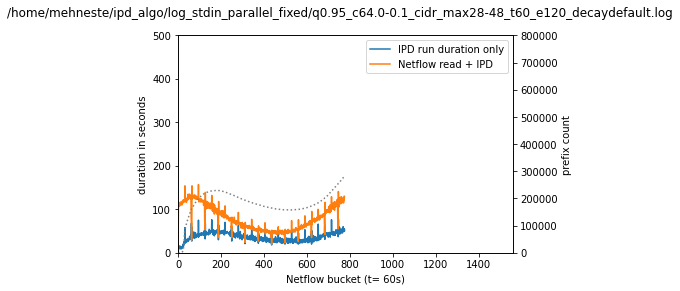

currently 1081.0 minutes done
IPD run: avg: 23.215341959334566s; min: 0; max: 63
iteration run: avg: 75.14431082331174s; min: 5s; max: 136s


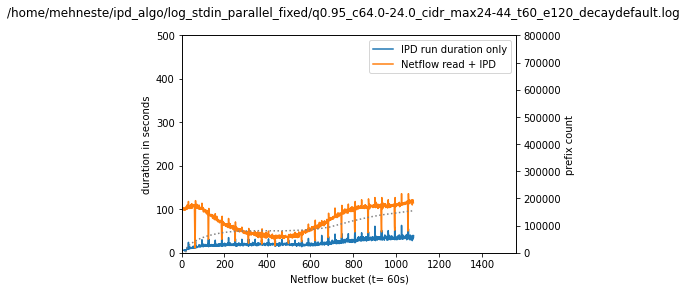

currently 524.0 minutes done
IPD run: avg: 128.30343511450383s; min: 0; max: 228
iteration run: avg: 155.6259541984733s; min: 5s; max: 277s


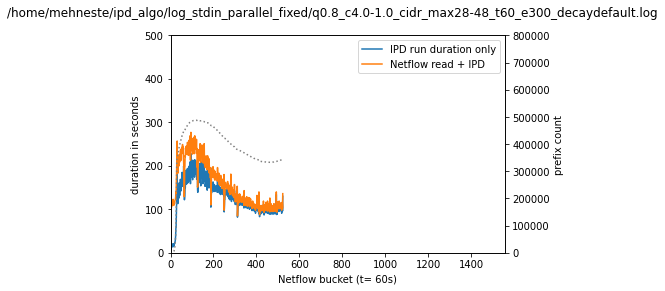

currently 768.0 minutes done
IPD run: avg: 39.975260416666664s; min: 0; max: 95
iteration run: avg: 80.79817708333333s; min: 5s; max: 156s


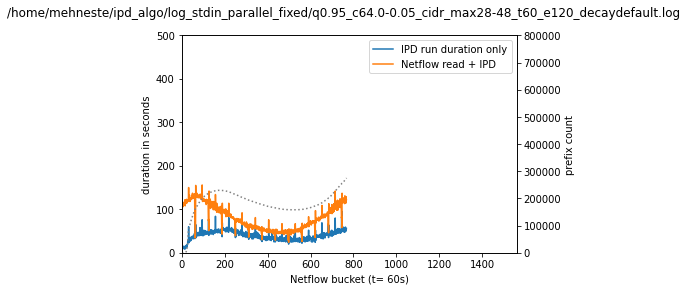

currently 948.0 minutes done
IPD run: avg: 41.277426160337555s; min: 0; max: 112
iteration run: avg: 85.88924050632912s; min: 5s; max: 167s


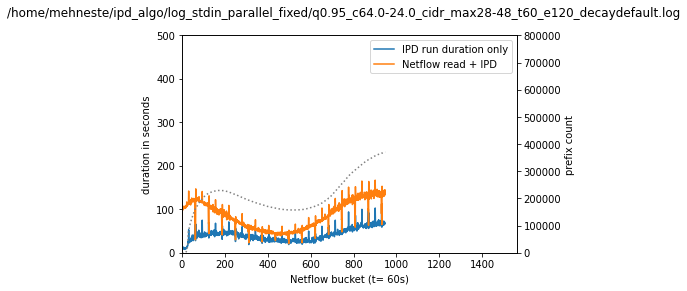

currently 248.0 minutes done
IPD run: avg: 59.11244979919679s; min: 0; max: 95
iteration run: avg: 114.5241935483871s; min: 5s; max: 159s


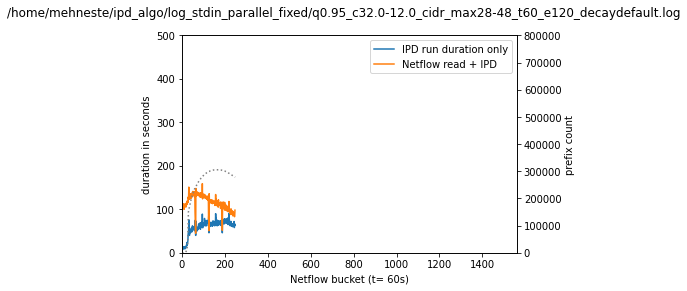

currently 854.0 minutes done
IPD run: avg: 51.88290398126464s; min: 0; max: 126
iteration run: avg: 145.89227166276348s; min: 39s; max: 272s


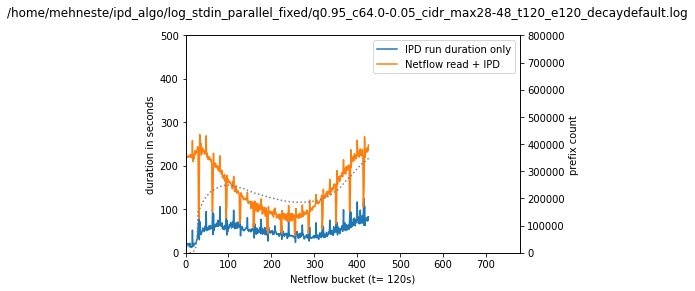

currently 876.0 minutes done
IPD run: avg: 54.259132420091326s; min: 0; max: 140
iteration run: avg: 93.03082191780823s; min: 5s; max: 198s


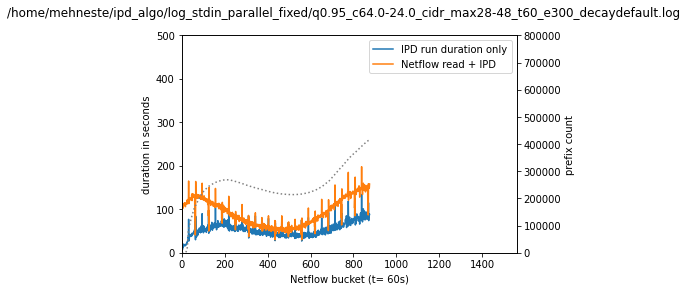

currently 1015.0 minutes done
IPD run: avg: 64.3529411764706s; min: 0; max: 404
iteration run: avg: 305.57142857142856s; min: 24s; max: 555s


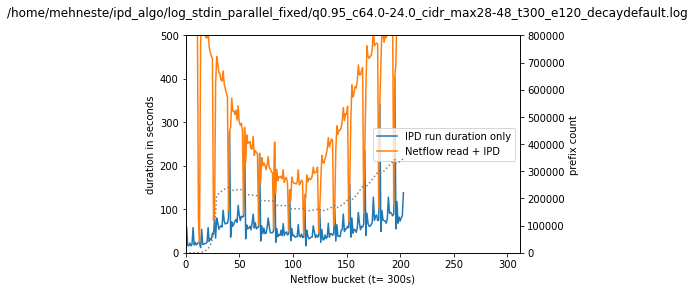

currently 379.0 minutes done
IPD run: avg: 176.9815303430079s; min: 0; max: 338
iteration run: avg: 215.4485488126649s; min: 5s; max: 405s


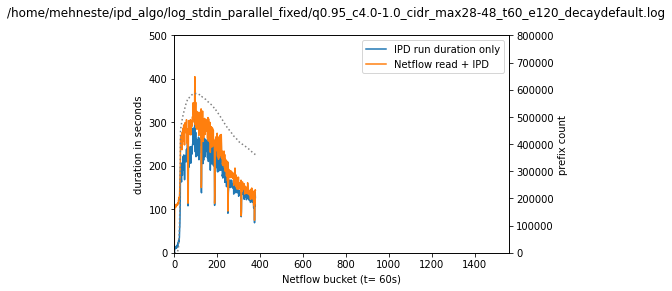

currently 929.0 minutes done
IPD run: avg: 40.40796555435953s; min: 0; max: 106
iteration run: avg: 87.67168998923573s; min: 5s; max: 169s


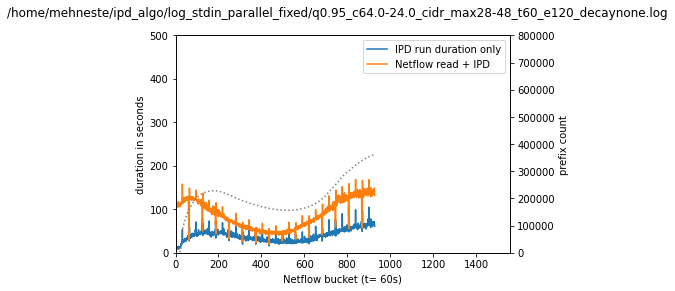

currently 1015.0 minutes done
IPD run: avg: 67.11274509803921s; min: 0; max: 373
iteration run: avg: 305.3990147783251s; min: 29s; max: 569s


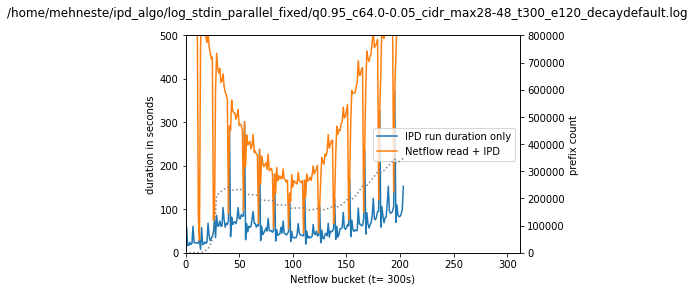

currently 1091.0 minutes done
IPD run: avg: 17.42216117216117s; min: 0; max: 65
iteration run: avg: 74.52795600366636s; min: 5s; max: 157s


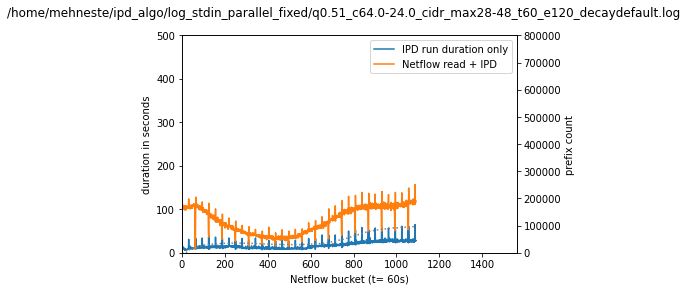

currently 1229.0 minutes done
IPD run: avg: 12.490243902439024s; min: 0; max: 29
iteration run: avg: 66.13344182262001s; min: 5s; max: 116s


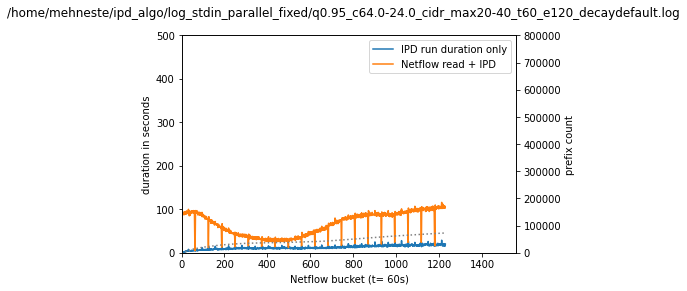

currently 944.0 minutes done
IPD run: avg: 42.52063492063492s; min: 0; max: 113
iteration run: avg: 86.23093220338983s; min: 5s; max: 173s


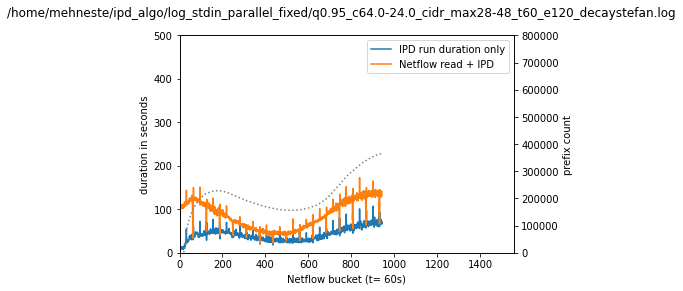

currently 949.0 minutes done
IPD run: avg: 42.462105263157895s; min: 0; max: 118
iteration run: avg: 85.80084299262381s; min: 5s; max: 167s


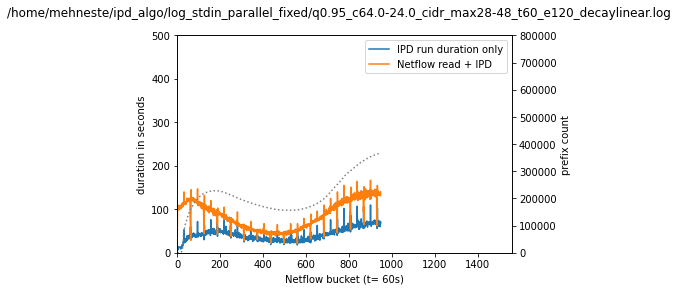

In [25]:
import datetime
from sys import prefix
import matplotlib.pyplot as plt
import  glob
import numpy as np



### data stuff

format = "%Y-%m-%d %H:%M:%S,%f"

for logfile in glob.glob("/home/mehneste/ipd_algo/log_stdin_parallel_fixed/*"):
    file = open(logfile, 'r')
    Lines = file.readlines()

    count=0
    last_start_ts=None
    start_ts=None
    end_ts=None

    ipd_run_list=[]
    iteration_run_list=[]
    prefix_list=[]
    for line in Lines:
        count += 1
        # print("Line{}: {}".format(count, line.strip()))
        x = line.split(" ")

        ts=datetime.datetime.strptime(f"{x[0]} {x[1]}", format)
        #print(ts)
        if last_start_ts == None:   last_start_ts = ts
        if "run IPD" in line:
            start_ts=ts
            try:
                prefix_list.append(int(x[-2]))
            except:
                pass

            if last_start_ts != start_ts:
                iteration_duration= start_ts- last_start_ts
                if int(iteration_duration.seconds) > 600:
                    #print(x)
                    print(f"Caution: {last_start_ts} -> {start_ts}: netflow ts: {int(x[-5])} iteration run took extremly long: {iteration_duration}")
                iteration_run_list.append(iteration_duration.seconds)
                last_start_ts = start_ts
            
        elif "Finished" in line:
            end_ts=ts
            duration = end_ts - start_ts
            ipd_run_list.append(duration.seconds)

    ## plotting stuff
    # get t
    t = int(logfile.split("_t")[1].split("_e")[0])/60
    

    fig,ax = plt.subplots()
    ax.plot(ipd_run_list, label="IPD run duration only")
    ax.plot(iteration_run_list, label="Netflow read + IPD")
    # ax.set_xticklabels(np.arange(0, 1560, t))

    ax.set_xlabel(f"Netflow bucket (t= {int(t*60)}s)")
    ax.set_ylabel("duration in seconds")
    ax.set_ylim(0, 500)
    ax.set_xlim(0, 1560/t)
    
    plt.legend()

    ax2=ax.twinx()
    ax2.plot(prefix_list, label="prefix count", linestyle="dotted", color="grey")
    ax2.set_ylabel("prefix count")
    ax2.set_ylim(0, 800000)


    plt.suptitle(f"{logfile}")

    print(f"currently {len(iteration_run_list)*t} minutes done")
    print(f"IPD run: avg: {sum(ipd_run_list) / len(ipd_run_list)}s; min: {min(ipd_run_list)}; max: {max(ipd_run_list)}")
    print(f"iteration run: avg: {sum(iteration_run_list) / len(iteration_run_list)}s; min: {min(iteration_run_list)}s; max: {max(iteration_run_list)}s")
    plt.show()
